In [19]:
# TO DO,
# get rid of max null columns,
# Map categorical to dummy df / one hot encoder / labelencode,
# Map binary categorical data to 0 and 1,
# Mapping letter \"l\" and \"o\" to numbers 1 and 0,

# Deal with weird space character s53 (delete or encode)
# Correlation between two columns

# https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [2]:
#pip freeze > requirements.txt

In [4]:
#pip install statsmodels

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#import statmodels.api as sm  # For statistical analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

In [62]:
# Viewing the values and getting an idea of the data
x = df.columns

for i in x:
    print(df[i].value_counts())
    print("\n************\n")

b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg=='    1
b'gAAAAABinOiekMHaC6-03yzvmLFVBfqljUIev5XFrbbJarEbo-mshNj5pWAXfTdmvEMQtb0WjtlboHt2rFBrCoipjAn9sOOZEg=='    1
b'gAAAAABinOiYtx-HpOZBYTtT-FndzIj6Nt2HTKu7UKAs-Dfxd8mxrvwxRNGE47Si_-kc5TiwVkTf59u94658aAU7gHD9-TGBMQ=='    1
b'gAAAAABinOia961WRLsDIRdEcGr5_RSKfmTjQ2ME5HBpIUtBdjJUeCTgVI6uzDIdnDRB58VBUvirHgdTdjgECltfpZ2XequVmA=='    1
b'gAAAAABinOibb7LcG8T4rQSnzf-b2GjK5D0F1ZLe6VMES-x90Pi5-Emk_dbp7xYXuepQpmVa_rhfEsemOUZUGn9_30mt-Vr8iQ=='    1
                                                                                                          ..
b'gAAAAABinOiawRN0qVxqLZn-_t1Qb87hktzzZnsBU00aUINCq1S48jnwhwxdn5XNd6mR189SFIILrWFbz0_LyBAvIlgUCImvqw=='    1
b'gAAAAABinOiZPy87pVtsRScbROxYGDhSan3Pp9q53S8zvzjZWJIhBd_PGqGRWUhxCwbTpmkda93liZMesGSchyhojqcCkJUD2w=='    1
b'gAAAAABinOib5XtfV1CgG7sJ3lqWVyVEX63543B09-SgMzYFlBkQuLmoEYkpfdNT1_v2JR0feyWOaSlNB_HLd2WSNncMF_Pu8Q=='    1
b'gAAAAABinOiZOg76i

- Discrete Values: s13, s48, n3, n12, n13, n15
- LabelEncode:  ~~Gender, s11, s12, s16, s17, s18, s58, s69, s70, s71~~
- Mapping: s52
- ? : s53
- Drop: ~~s59, s57, s56, s55, s54~~
- Continuous vals: n1, n2, n4, n5, n6, n7, n8, n9, n10, n11, n14

In [27]:
df.isnull().sum()

id        0
gender    0
s11       0
s12       0
s13       0
s16       0
s17       0
s18       0
s48       0
s52       0
s53       0
s58       0
s69       0
s70       0
s71       0
n1        0
n2        0
n3        0
n4        0
n5        0
n6        0
n7        0
n8        0
n9        0
n10       0
n11       0
n12       0
n13       0
n14       0
n15       0
label     0
dtype: int64

In [24]:
df[['s59','s57','s56','s55','s54']] #Null columns

,s59,s57,s56,s55,s54
0,NaN,NaN,NaN,kK,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
28317,NaN,NaN,NaN,NaN,NaN
28318,NaN,NaN,NaN,2K,NaN
28319,NaN,NaN,NaN,NaN,NaN
28320,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['s59','s57','s56','s55','s54'], axis = 1, inplace= True)

In [56]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [5]:
# Use Label encoding for binary categorical data (Only two options eg: M/F, Y/N)
# Using scikit.learn library

label_encoder = preprocessing.LabelEncoder()

label_encode = ['gender','s11','s12','s53','s58']

for column in label_encode:
    df[column]= label_encoder.fit_transform(df[column])  
    df[column].unique()
    df[column].value_counts()

In [6]:
one_hot_encode = ['s16','s17','s18','s69','s70','s71']
ohe_df = pd.get_dummies(df[one_hot_encode])

# Drop column each of the original columns in the original database 
# as they are now encoded
df = df.drop(columns=one_hot_encode, axis = 1)

# Join the encoded df
df = df.join(ohe_df)


In [12]:
df=df[[c for c in df if c not in ['label']] 
       + ['label']]

In [13]:
df.head()

,id,gender,s11,s12,s13,s48,s52,s53,s58,n1,...,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,0,1,1,1,16.144666,...,0,0,0,0,1,0,1,0,0,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,1,1,1,1,7.144558,...,0,0,0,0,1,0,1,0,0,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,0,1,1,1,6.923236,...,0,0,0,0,1,0,1,0,0,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,0,1,1,1,5.749840,...,0,0,0,0,1,0,1,0,0,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,l,1,1,14.771959,...,1,0,0,0,1,0,0,0,1,0


In [22]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D', 's69_0',
       's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B', 's70_op: C',
       's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d', 'label'],
      dtype='object')

In [30]:
df_ohe= df[['s16_A', 's16_B', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D', 's69_0',
       's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B', 's70_op: C',
       's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']].corr()

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

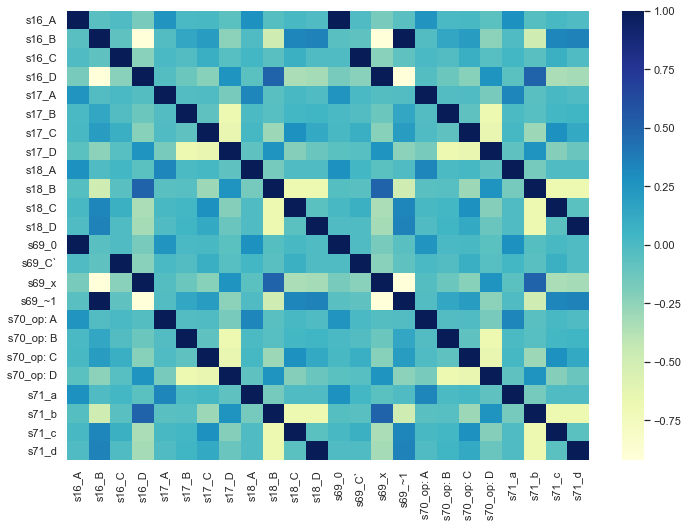

In [33]:
dataplot = sns.heatmap(df_ohe, cmap="YlGnBu")
  
# displaying heatmap
plt.show()

In [36]:
df[['s69_0','s16_B']].value_counts()
df['s16_B'].value_counts()
df['s69_0'].value_counts()

s69_0  s16_B
0      0        21568
       1         6446
1      0          308
dtype: int64

In [19]:
df_desc= df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']].describe()

In [20]:
df_desc.to_clipboard()